In [1]:
import sympy as sym
import numpy as np
import scipy as sp
from scipy import linalg, spatial

import matplotlib.pyplot as plt

### Analitična izpeljava - 1D

In [2]:
x,L,A,ρ,E,I,α = sym.symbols('x,L,A,ρ,E,I,α')

# vektor monomov
monomi = sym.lambdify(x, sym.Matrix([[1,x]]), 'sympy')
monomi(x)

Matrix([[1, x]])

In [3]:
# vektor oblikovnih funkcij
Ne = monomi(x) @ sym.Matrix([monomi(0),monomi(L)])**-1
Ne

Matrix([[1 - x/L, x/L]])

In [4]:
# odvodi oblikovnih funkcij
Be = sym.diff(Ne,x,1)
Be

Matrix([[-1/L, 1/L]])

In [5]:
# masna matrika
Me = sym.integrate(A*ρ* Ne.T @ Ne,(x,0,L))
Me

Matrix([
[A*L*ρ/3, A*L*ρ/6],
[A*L*ρ/6, A*L*ρ/3]])

In [6]:
# togostna matrika
Ke = sym.integrate(E*A* Be.T @ Be,(x,0,L))
Ke

Matrix([
[ A*E/L, -A*E/L],
[-A*E/L,  A*E/L]])

# Numerična obravnava

### Generacija masne in togostne matrike

In [7]:
# podatki
A = 100 # mm^2
ρ = 7.85e-9 # kg/mm^3
E = 2.0e5 # MPa
L0 = 1000 # mm

In [8]:
# masna matrika
def M_e(A, L, ρ):

    M = ρ*A*L/6*np.array([
    [2, 0, 1, 0],
    [0, 2, 0, 1],
    [1, 0, 2, 0],
    [0, 1, 0, 2]])
    
    return M

In [9]:
# togostna matrika
def K_e(A, E, L, α):

    c = np.cos(α)
    s = np.sin(α)
    
    K = A*E/L*np.array([
    [ c**2,   s*c, -c**2,  -s*c],
    [  s*c,  s**2,  -s*c, -s**2],
    [-c**2,  -s*c,  c**2,   s*c],
    [ -c*s, -s**2,   s*c,  s**2]])
    
    return K

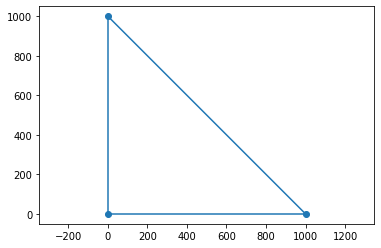

In [20]:
# vozlišča in elementi
vozlisca = L0*np.array([[0,0],[1,0],[0,1]])
elementi = np.array([[0,1],[1,2],[2,0]])

[plt.plot(vozlisca[[i,j],0],vozlisca[[i,j],1],'-',c='C0') for i,j in elementi]
plt.plot(vozlisca[:,0],vozlisca[:,1],'o');
plt.axis('equal');

In [22]:
# sestavljanje globalne masne in togostne matrike
M_glob = np.zeros((vozlisca.size,vozlisca.size))
K_glob = np.zeros((vozlisca.size,vozlisca.size))

# dopolniti

### Reševanje problema lastnih vrednosti

In [23]:
# lastne vrednosti in lastni vektorji
eig_val, eig_vec = sp.linalg.eig(K_glob, M_glob)

# urejanje po velikosti - dopolniti

In [10]:
# izris lastnih oblik

# nedeformirano stanje
[plt.plot(vozlisca[[i,j],0],vozlisca[[i,j],1],'-', c='C0') for i,j in elementi]
plt.plot(vozlisca[:,0],vozlisca[:,1],'o', c='C0');
plt.axis('equal');

# deformirano stanje
[plt.plot(modeshape[[i,j],0],modeshape[[i,j],1],'-', c='C1') for i,j in elementi]
plt.plot(modeshape[:,0],modeshape[:,1],'o', c='C1');
plt.axis('equal');

NameError: name 'elementi' is not defined

### Sprememba robnih pogojev